# Imports and data initialization

##### Import libraries:

In [6]:
import folium
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

##### Load data:

In [7]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

#Locally
local_path = "data/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv"

Mounted at /content/drive


In [8]:
# Add correct path for location of Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv
path = "/content/drive/MyDrive/Social_Data_and_Visualisation/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv"

df = pd.read_csv(path)

##### Add extra attributes to the data frame:

In [9]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Hour'] = [int(time[0:2]) for time in (df['Time'])]

# Part 1: Temporal Patterns

In this exercise, please generate the visualizations described below. Use the same date-ranges as in Week 1. For each set of plots, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (a couple of ideas below for things that could be interesting to comment on ... but it's OK to chose something else).

In [10]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

In [11]:
# filter dataframe for focus crimes
df = df[df.Category.isin(focuscrimes)]
# we are going to filter out data from 2018 as they are incomplete
filter_p1 = (df['Year'] >= 2003) & (df['Year'] <= 2017)
df_p1 = df[filter_p1]

We define a function to help as plot for different time periods as:

In [12]:
def plotFocusCrimes(df, time_list, label_list, time_category):
  plt.figure(figsize=(25,20))

  for j,crime in enumerate(focuscrimes):
    numbers = np.zeros(len(time_list))
    for i, item in enumerate(time_list):
      numbers[i] = len(df[(df[time_category]==item) & (df['Category'] == crime)])
    
    plt.subplot(5,3,j+1)
    plt.title(crime)
    plt.bar(label_list,numbers)
  plt.show

## Weekly patterns

Basically, we'll forget about the yearly variation and just count up what happens during each weekday. Hint for comment: Some things make sense - for example drunkenness and the weekend. But there are some aspects that were surprising to me. Check out prostitution and mid-week behavior, for example!?

In [ ]:
day_array = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

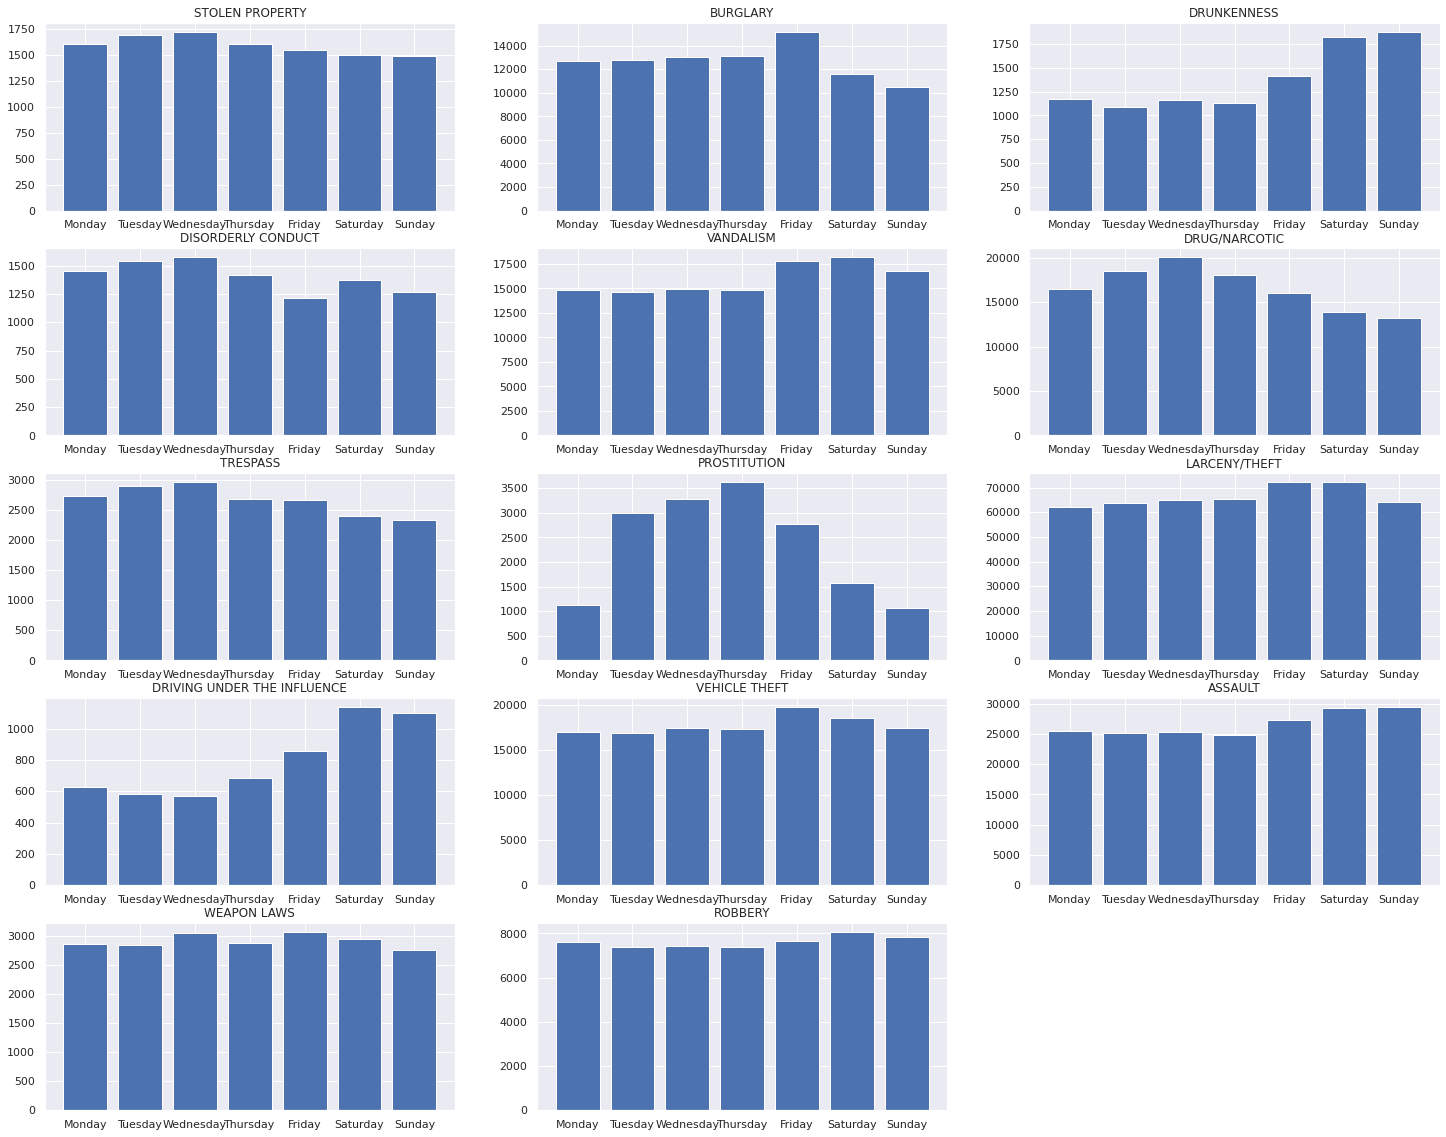

In [ ]:
plotFocusCrimes(df_p1, day_array, day_array, 'DayOfWeek')

## Monthly Patterns

In [ ]:
month_array = np.sort(df_p1['Month'].unique())
month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

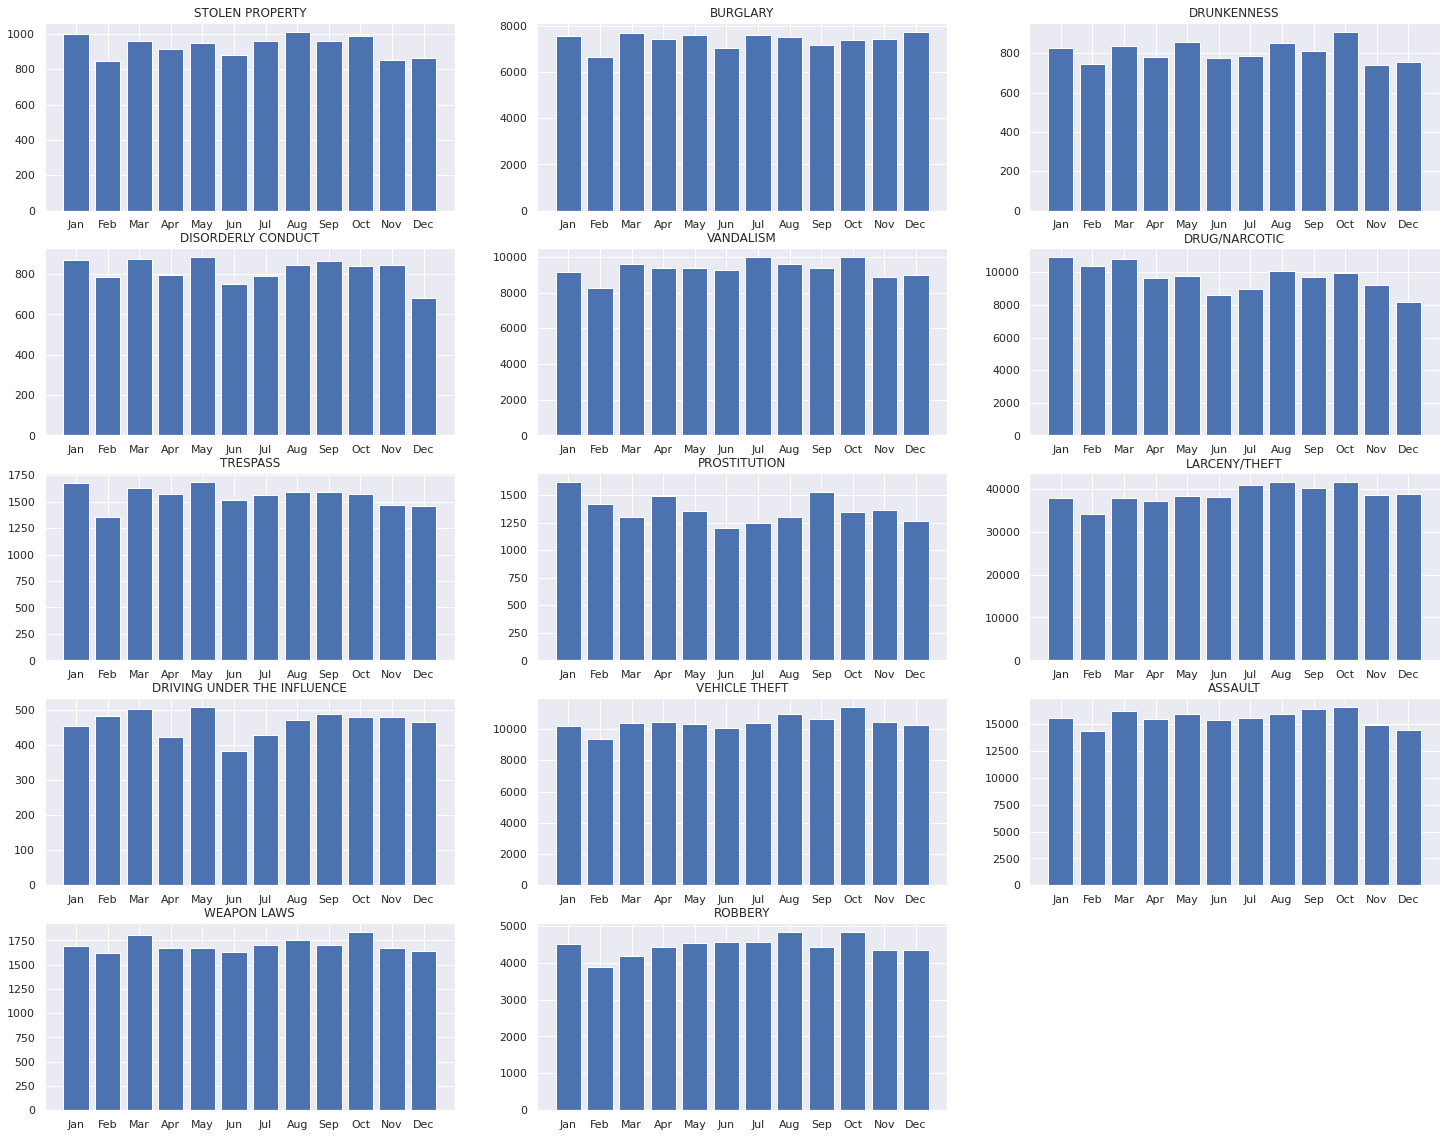

In [ ]:
plotFocusCrimes(df_p1, month_array, month_labels, 'Month')

## Daily Patterns

We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see.

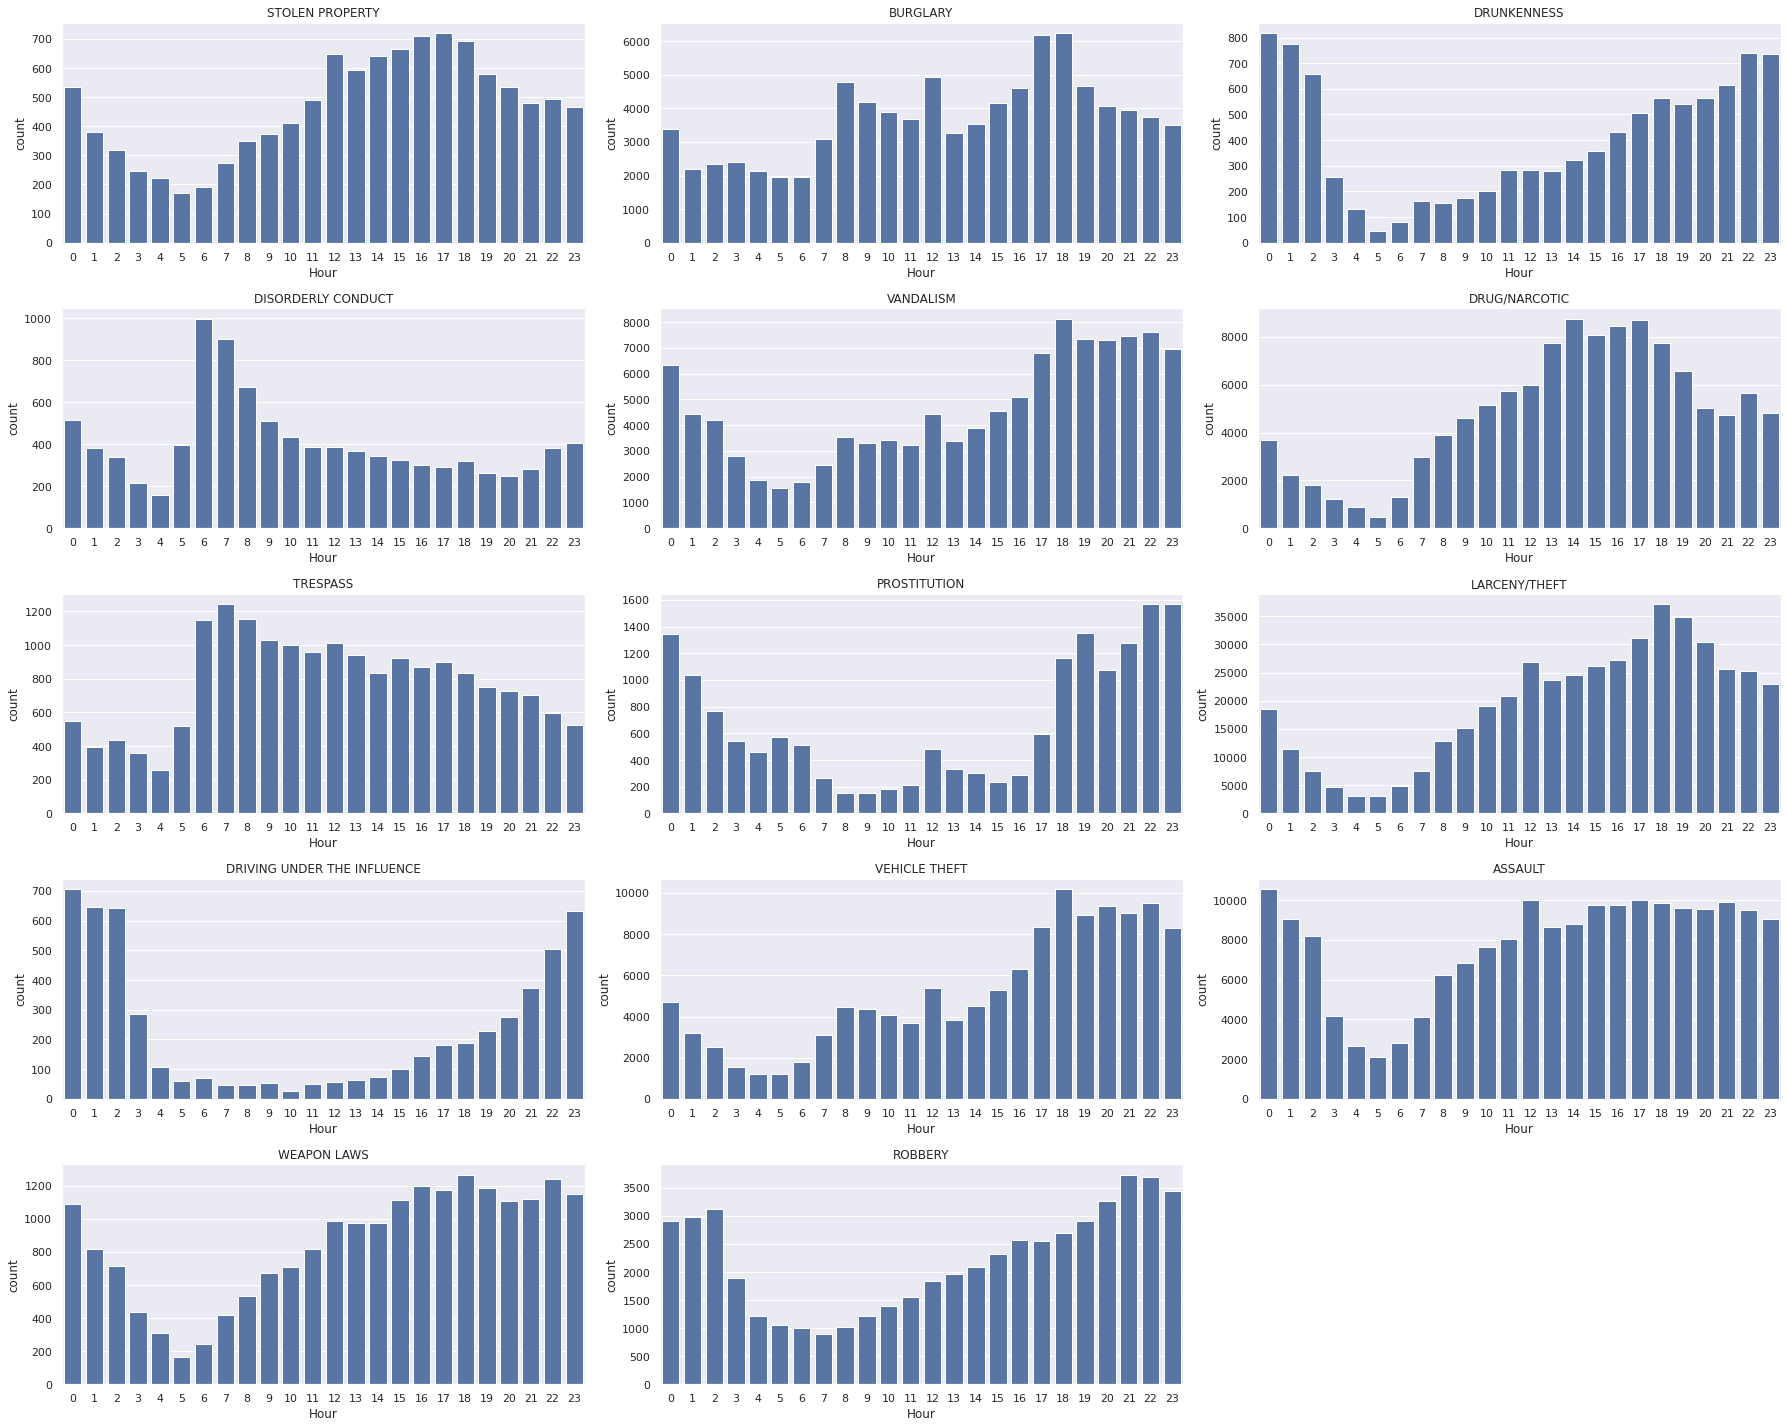

In [ ]:
# %%
plt.figure(figsize=(25,20))
plt.tight_layout()
for i, category in enumerate(focuscrimes):
    plt.subplot(5, 3, i + 1)
    plt.title(category)
    sns.countplot(data=df_p1[df_p1.Category == category], x="Hour", color="b")
    plt.tight_layout()


## Weekly Patterns by Hour

Hours of the week. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.


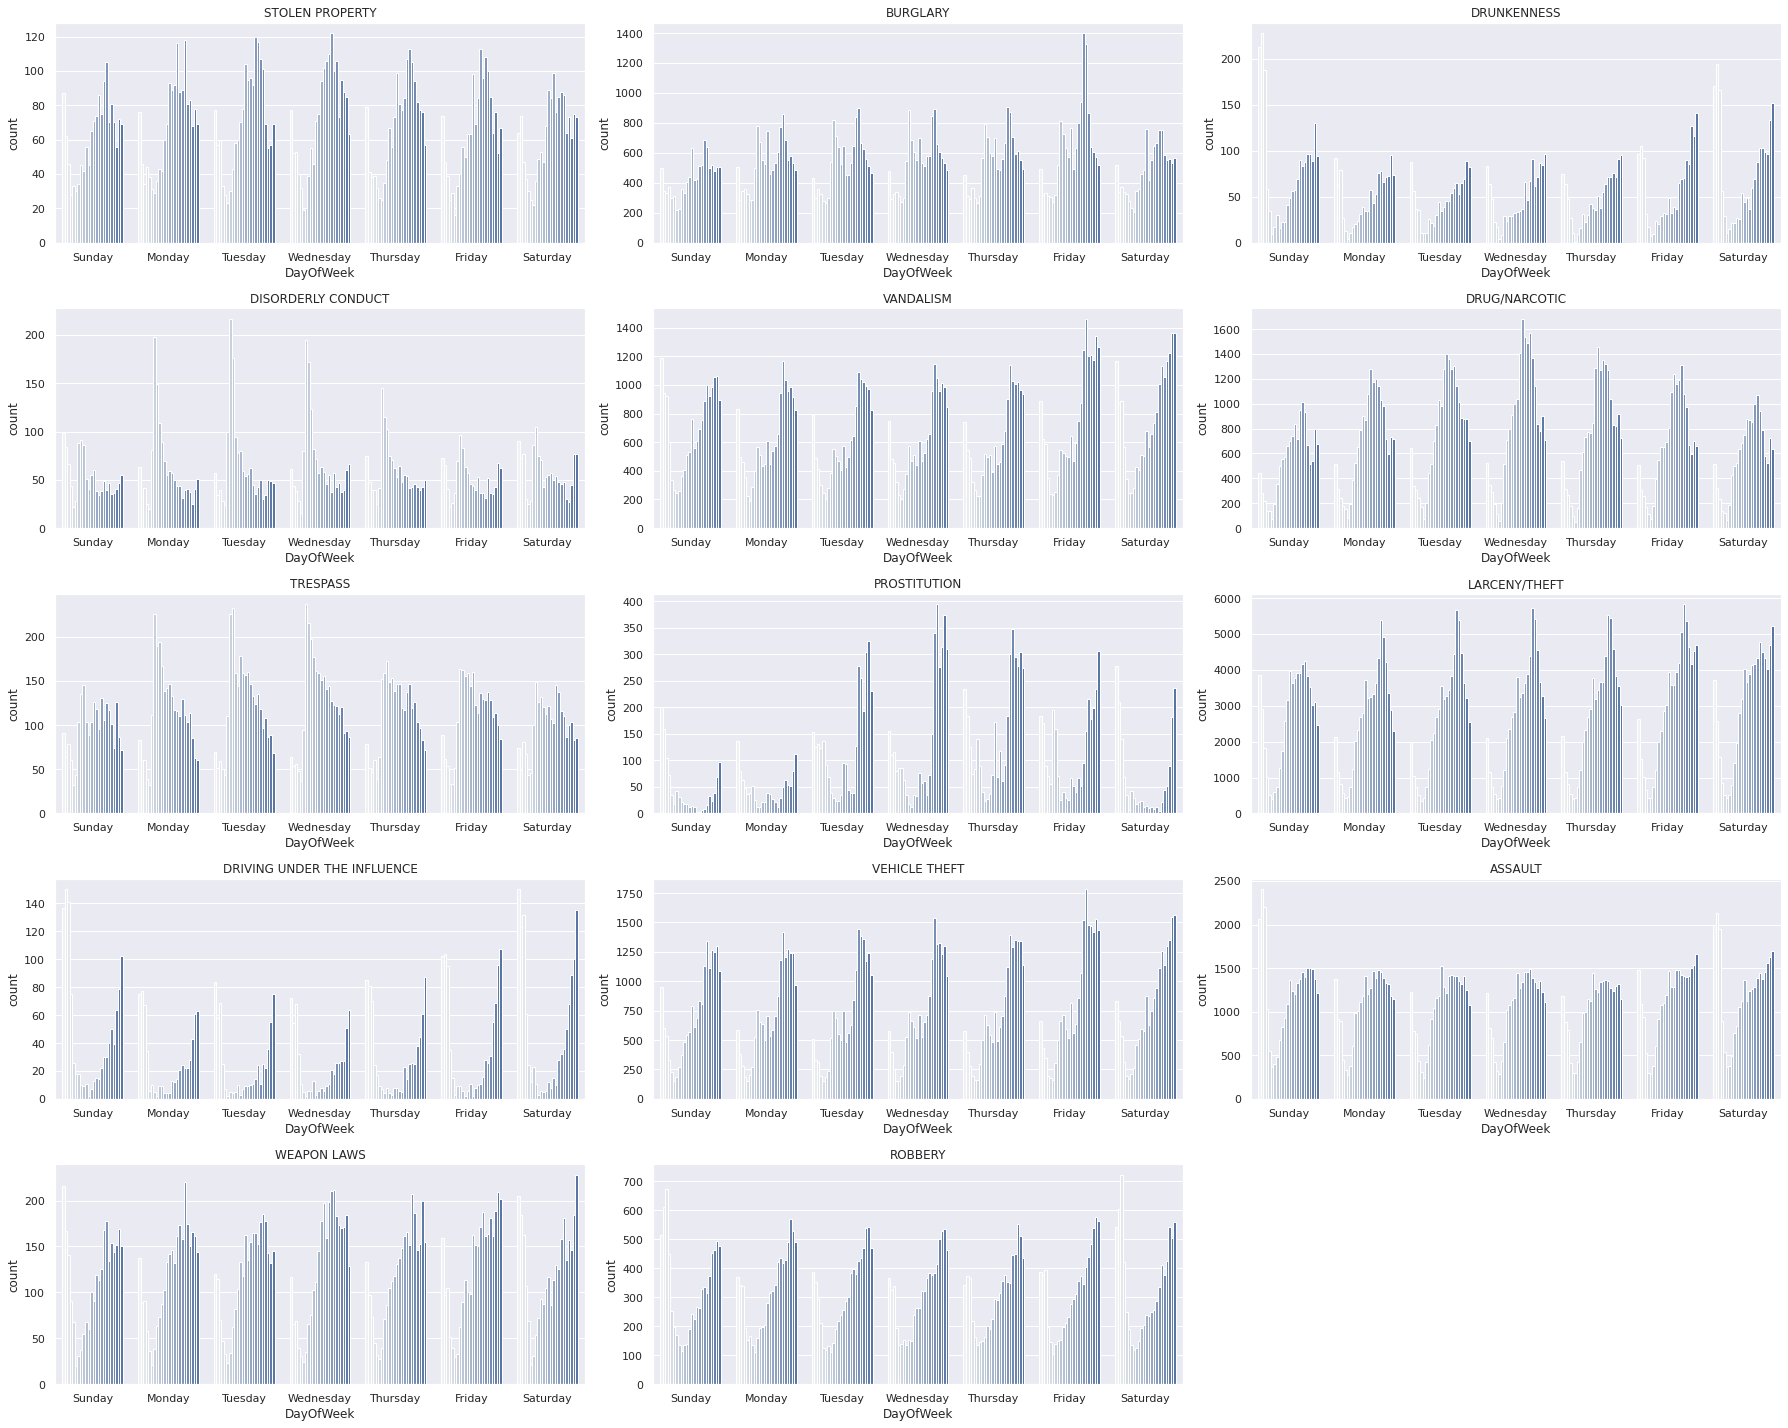

In [ ]:
# %%

# %%
plt.figure(figsize=(25,20))
order = ["Sunday" ,"Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
plt.tight_layout()
for i, category in enumerate(focuscrimes):
    plt.subplot(5, 3, i + 1)
    plt.title(category)
    sns.countplot(
        data=df_p1[df_p1.Category == category],
        x="DayOfWeek",
        order=order,
        hue="Hour",
       # palette=palette,
        color='b'
    )
    
    plt.legend([], [], frameon=False)
    plt.tight_layout()

# Part 2: Thinking about data and visualization

## Pearson Correlation
Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?

${\displaystyle r_{xy}={\frac {\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{{\sqrt {\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}{\sqrt {\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}}}}$	
 

 

 
It only works on linear relations - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5079093/ 
 



## Bar chart vs Histogram
What is the difference between a bar-chart and a histogram?


"So far we have mentioned three differences between histograms and bar charts: histograms are used to show distributions of variables while bar charts are used to compare variables. Histograms plot binned quantitative data while bar charts plot categorical data. Bars can be reordered in bar charts but not in histograms." - https://www.forbes.com/sites/naomirobbins/2012/01/04/a-histogram-is-not-a-bar-chart/?sh=1c0358376d77

## Bin size in Histograms
I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it.


"

læs den her:
https://www.fmrib.ox.ac.uk/datasets/techrep/tr00mj2/tr00mj2/node24.html

# Part 3

## Jitter plot
First, let's make a jitter-plot based on SF Police data. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.

In [ ]:
# choose crime type
crime_type="LARCENY/THEFT"
# choose period
month = [1]
# filter df
condition = (df.Category == crime_type) & (df.Month.isin(month))
df_jitter = df[condition]
# select 1 hour
df_jitter_1hour = df_jitter[df_jitter.Hour == 14]

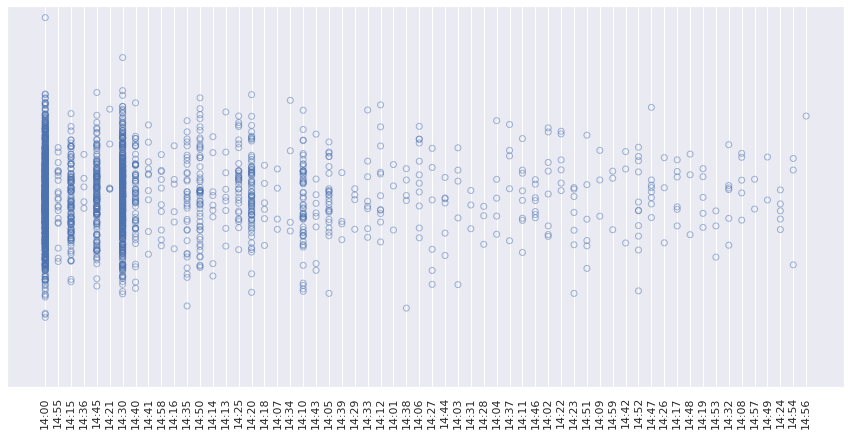

In [ ]:
# create jitter plot
x = df_jitter_1hour.Time
y = [1 + np.random.randn()/5 for i in range(len(df_jitter_1hour))]
plt.figure(figsize=(15,7))
plt.scatter(x, y, alpha=0.5, facecolors="none", edgecolors="b")
plt.ylim((0, 2))
plt.xticks(rotation=90)
plt.yticks([])
plt.show()

## Histograms

Create a crime-data based versions of the plot-type shown in DAOST Figure 2-2, e.g. GPS data.
1. pick two crime-types with different geographical patterns and a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
2. Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like numpy.histogram. This function gives you the counts and then you do your own plotting.


In [ ]:
# get latitude
def get_latitude(x: str) -> float:
    return float(x.split(" ")[1].replace("(", ""))


lat = df.location.apply(get_latitude)

df["LAT"] = lat

In [ ]:
for cat in focuscrimes:
    print(f"Avg Number of crimes for {cat}: ", df[df.Category==cat].groupby("Month").count().PdId.mean())

Avg Number of crimes for STOLEN PROPERTY:  954.1666666666666
Avg Number of crimes for BURGLARY:  7588.916666666667
Avg Number of crimes for DRUNKENNESS:  813.3333333333334
Avg Number of crimes for DISORDERLY CONDUCT:  827.6666666666666
Avg Number of crimes for VANDALISM:  9559.833333333334
Avg Number of crimes for DRUG/NARCOTIC:  9822.916666666666
Avg Number of crimes for TRESPASS:  1599.5
Avg Number of crimes for PROSTITUTION:  1375.0833333333333
Avg Number of crimes for LARCENY/THEFT:  39831.25
Avg Number of crimes for DRIVING UNDER THE INFLUENCE:  471.0
Avg Number of crimes for VEHICLE THEFT:  10519.0
Avg Number of crimes for ASSAULT:  15948.666666666666
Avg Number of crimes for WEAPON LAWS:  1750.3333333333333
Avg Number of crimes for ROBBERY:  4538.916666666667


In [ ]:
category_1 = "DRUG/NARCOTIC"
category_2 = "VEHICLE THEFT"
catogories = {category_1, category_2}
months = {1,2}
df_lat = df[(df.Category.isin(categories) & df.Month.isin(months))]
# filter out outliers with LAT > -121
df_lat = df_lat[df_lat.LAT < -121]

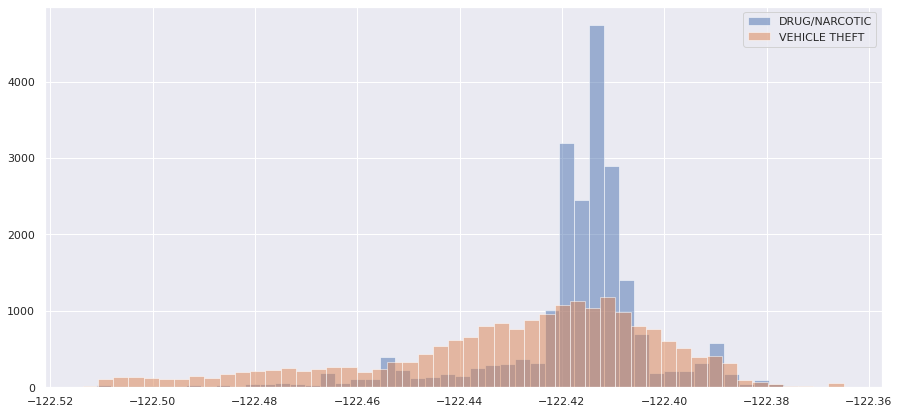

In [ ]:
plt.figure(figsize=(15,7))
plt.hist(df_lat[df_lat.Category==category_1].LAT, bins=50, alpha=0.5, label=category_1)
plt.hist(df_lat[df_lat.Category==category_2].LAT, bins=50, alpha=0.5, label=category_2)
plt.legend()
plt.show()

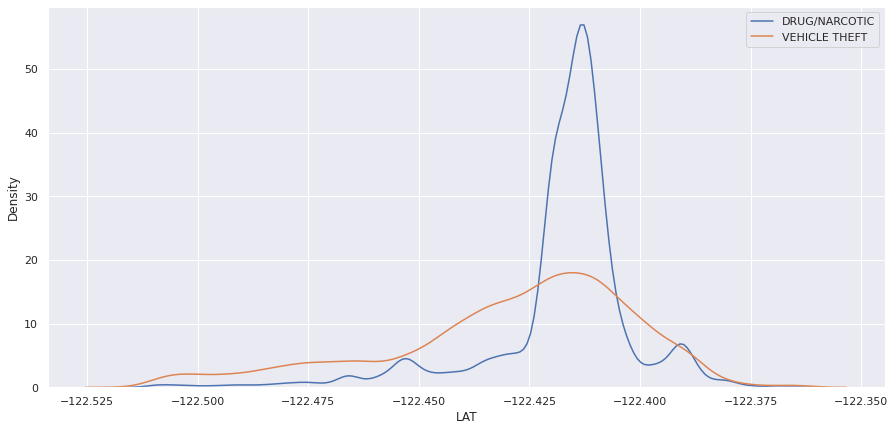

In [ ]:
plt.figure(figsize=(15,7))
sns.kdeplot(df_lat[df_lat.Category==category_1].LAT, alpha=0.5, label=category_1)
sns.kdeplot(df_lat[df_lat.Category==category_2].LAT, alpha=0.5, label=category_2)
plt.legend()
plt.show()

# Part 4

##### **4.1) First start by plotting a map of San Francisco with a nice tight zoom. Simply use the command folium.Map([lat, lon], zoom_start=13), where you'll have to look up San Francisco's longitude and latitude.**

##### **4.2) Next, use the the coordinates for SF City Hall 37.77919, -122.41914 to indicate its location on the map with a nice, pop-up enabled maker. (In the screenshot below, I used the black & white Stamen tiles, because they look cool).**

A map is constructed with the coordinates for San Fransisco (37.762, -122.44) and a popup marker is placed at the City Hall : 

In [ ]:
lat = 37.762 ; lon = -122.44                                                                       # Latitude and longitude for San Fransisco
map_SF = folium.Map([lat, lon], zoom_start=13, height='80%', width='60%',zoom_control=False)       # Create map
folium.Marker([37.77919,-122.41914], popup='City Hall').add_to(map_SF)                             # Add popup Marker

# Make title
title_lat = 37.812 ; title_lon = -122.518                                                          
folium.map.Marker([title_lat, title_lon], icon=folium.features.DivIcon(icon_size=(190,36),icon_anchor=(0,0),html='<div style="font-size: 20pt"><b>Location of San Fransisco City Hall</b></div>',)).add_to(map_SF)

map_SF

From the interactive map the exact location of the San Fransisco City Hall is marked with a popup marker, that tells you what to find at this location on mouse click.

##### **4.3) Now, let's plot some more data (no need for popups this time). Select a couple of months of data for 'DRUG/NARCOTIC' and draw a little dot for each arrest for those two months. You could, for example, choose June-July 2016, but you can choose anything you like - the main concern is to not have too many points as this uses a lot of memory and makes Folium behave non-optimally. We can call this a kind of visualization a point scatter plot.**

Data is filtrered to only contain DRUG/NARCOTIC crimes in the period June-July 2016:

In [ ]:
# Create filtered data set
filter = (df['Year']==2016) & ((df['Month']==6) | (df['Month']==7)) &(df['Category'] == 'DRUG/NARCOTIC')      # Create Filter
df_filtered = df[filter]                                                                                      # Apply Filter

Crime data is plotted on a map of SF. A map filter is added to increase visabilisity of the plotted crime positions:

In [ ]:
# Create map
map_SF = folium.Map([lat, lon], tiles = "Stamen Toner", zoom_start=13, height='80%', width='60%', zoom_control=False)

# Plot data coordinates
for index, row in df_filtered.iterrows():
  folium.CircleMarker([row['Y'], row['X']], radius=1, color='red').add_to(map_SF)

# Add title
folium.map.Marker([title_lat, title_lon], icon=folium.features.DivIcon(icon_size=(190,36),icon_anchor=(0,0),html='<div style="color: white; font-size: 20pt"><b>Location of drug/narcotic crimes in June/July 2016</b></div>',)).add_to(map_SF)

map_SF


From the interactive map trends in drug/narcotic crimes can be found in the period June/July 2016. By zooming in and out exact locations of hot spots can be found. A clutering of crimes reported can be seen in the *Tenderloin District* - around the end of *Turk Street* and *Golden Gate Avenue*. Other clusterings appear in *6th Street*, down *3rd Street*, at *16th Mission St* Metro station  and just before *Golden Gate Park* 

# Part 5

In [26]:
# filter dataframe for focus crimes
df_p5 = df[(df['DayOfWeek'] == 'Monday') & (df['Category']=='PROSTITUTION') & (df['Year']==2016)]
# we are going to filter out data from 2018 as they are incomplete

day_array = np.sort(df_p5['Month'].unique())


<function matplotlib.pyplot.show>

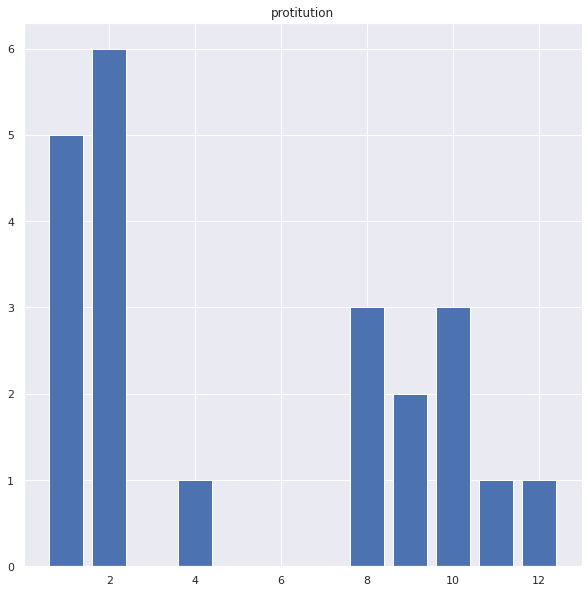

In [27]:
plt.figure(figsize=(10,10))

numbers = np.zeros(len(day_array))
for i, item in enumerate(day_array):
  numbers[i] = len(df_p5[(df_p5['Month']==item)])

plt.title('protitution')
plt.bar(day_array,numbers)
plt.show

I think it is a thursday thing to report prostitution